In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn # Plot functions
from cmocean import cm as cmo # Colormaps

In [26]:
# Load merged database
dfMerged = pd.read_pickle('Merged_Database.pkl')
dfMerged.head()

,CONDITION_CODE,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus,FRDH,FRDV,...,ATMP,BAR,DPD,EasterlyPersistence,GST,SoutherlyPersistence,WD,WSPD,WTMP,WVHT
REPORT_DATE,,,,,,,,,,,,,,,,,,,,,
1999-03-07,4.0,4.0,0,0,0,4,0,0,-15.740840,1.664723,...,-1.104167,1011.250000,8.690000,-1.597614,16.291667,11.183859,207.541667,13.054167,2.666667,3.387917
1999-03-08,0.0,0.0,0,0,0,0,0,0,1.522195,-2.273765,...,-5.695833,1023.441667,9.164583,-10.374381,16.000000,7.568804,305.875000,12.883333,2.416667,2.469167
1999-03-09,0.0,0.0,0,0,0,0,0,0,-4.228270,-2.525344,...,-2.917391,1019.917391,7.371304,-8.124423,11.986957,5.416860,302.347826,9.930435,2.400000,1.556087
1999-03-10,0.0,0.0,0,0,0,0,0,0,-10.688324,-8.692065,...,-1.233333,1010.266667,9.026250,-4.053519,6.687500,2.885376,293.833333,5.408333,2.400000,1.031667
1999-03-11,0.0,0.0,0,0,0,0,0,0,4.257733,-7.564427,...,0.379167,1002.666667,9.791250,-7.269797,10.325000,4.485525,301.500000,8.570833,2.358333,1.192500


In [27]:
# Calculation correlation matrix
dfCorr = dfMerged.corr()
dfCorr['NUM_ANIMALS']
#dfCorr['count']

CONDITION_CODE                   0.519406
NUM_ANIMALS                      1.000000
SPECIES_Delphinus delphis        0.760635
SPECIES_Globicephala melas       0.119792
SPECIES_Grampus griseus          0.014600
SPECIES_Lagenorhynchus acutus    0.087733
SPECIES_Stenella coeruleoalba    0.003514
SPECIES_Tursiops truncatus       0.007737
FRDH                             0.002088
FRDV                            -0.007965
OTTH                             0.000468
OTTV                            -0.003314
dH                               0.003694
dV                              -0.002362
Kp_index                        -0.017662
Sunspot_No                       0.006756
Dst_index                        0.022548
AE_index                        -0.013781
Proton_flux_gt30MeV             -0.002093
Proton_flux_gt60MeV             -0.002629
High Tide Ave                    0.017781
Low Tide Ave                    -0.029308
High Tide Max                    0.009054
High Tide Min                    0

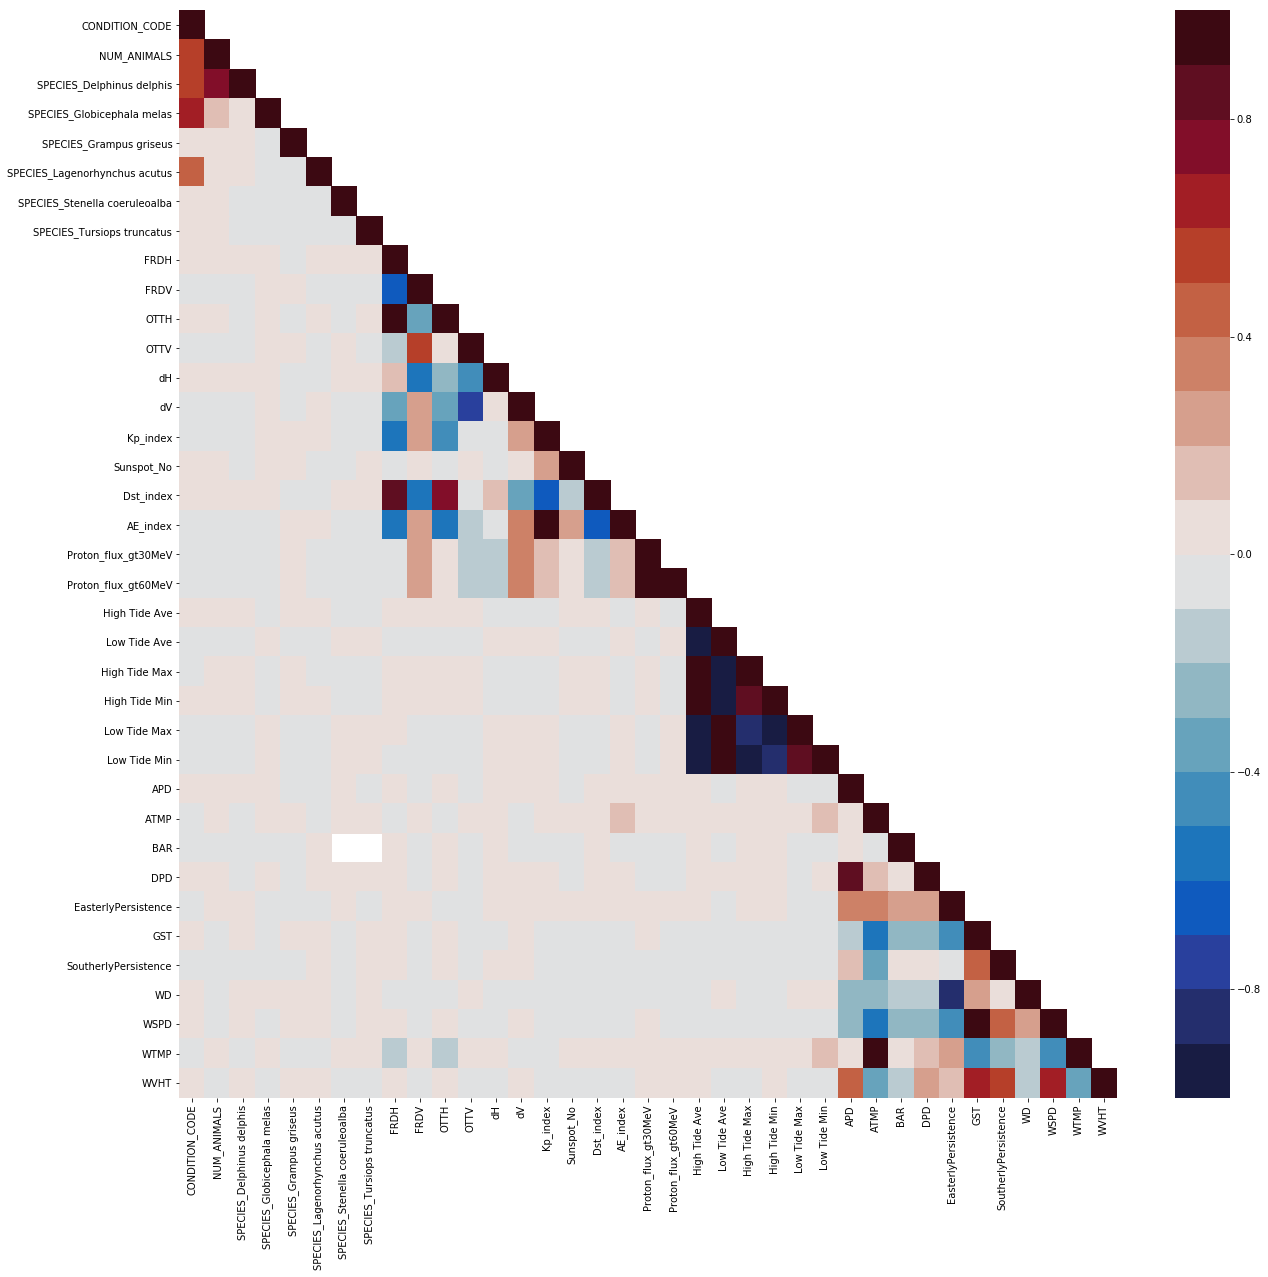

In [28]:
# Plot correlation matrix
f, ax = plt.subplots(figsize=(21, 20))
#ax.set_facecolor('black')
cmdict = cmo.tools.get_dict(cmo.balance)
my_cmap = matplotlib.colors.LinearSegmentedColormap('matteo', cmdict,20)
seaborn.heatmap(dfCorr, ax=ax, vmin=-1, vmax=1, mask=np.triu(np.ones([dfCorr.shape[1]]*2), k=1),cmap=my_cmap)

In [29]:
dfMerged.loc[dfMerged['NUM_ANIMALS'] > 0, 'ANIMALS_BINARY'] = 1 # 0 = no event; 1 = event
dfMerged['ANIMALS_BINARY'].fillna(0.,inplace=True)
dfCorr = dfMerged.corr()
dfCorr['ANIMALS_BINARY']

CONDITION_CODE                   0.606356
NUM_ANIMALS                      0.365040
SPECIES_Delphinus delphis        0.579814
SPECIES_Globicephala melas       0.106338
SPECIES_Grampus griseus          0.124464
SPECIES_Lagenorhynchus acutus    0.457981
SPECIES_Stenella coeruleoalba    0.090711
SPECIES_Tursiops truncatus       0.090711
FRDH                             0.007034
FRDV                            -0.009677
OTTH                             0.005750
OTTV                            -0.008948
dH                               0.004730
dV                               0.004076
Kp_index                        -0.017416
Sunspot_No                      -0.024248
Dst_index                        0.013856
AE_index                        -0.014651
Proton_flux_gt30MeV              0.000544
Proton_flux_gt60MeV             -0.004747
High Tide Ave                   -0.005154
Low Tide Ave                    -0.015432
High Tide Max                   -0.007634
High Tide Min                   -0

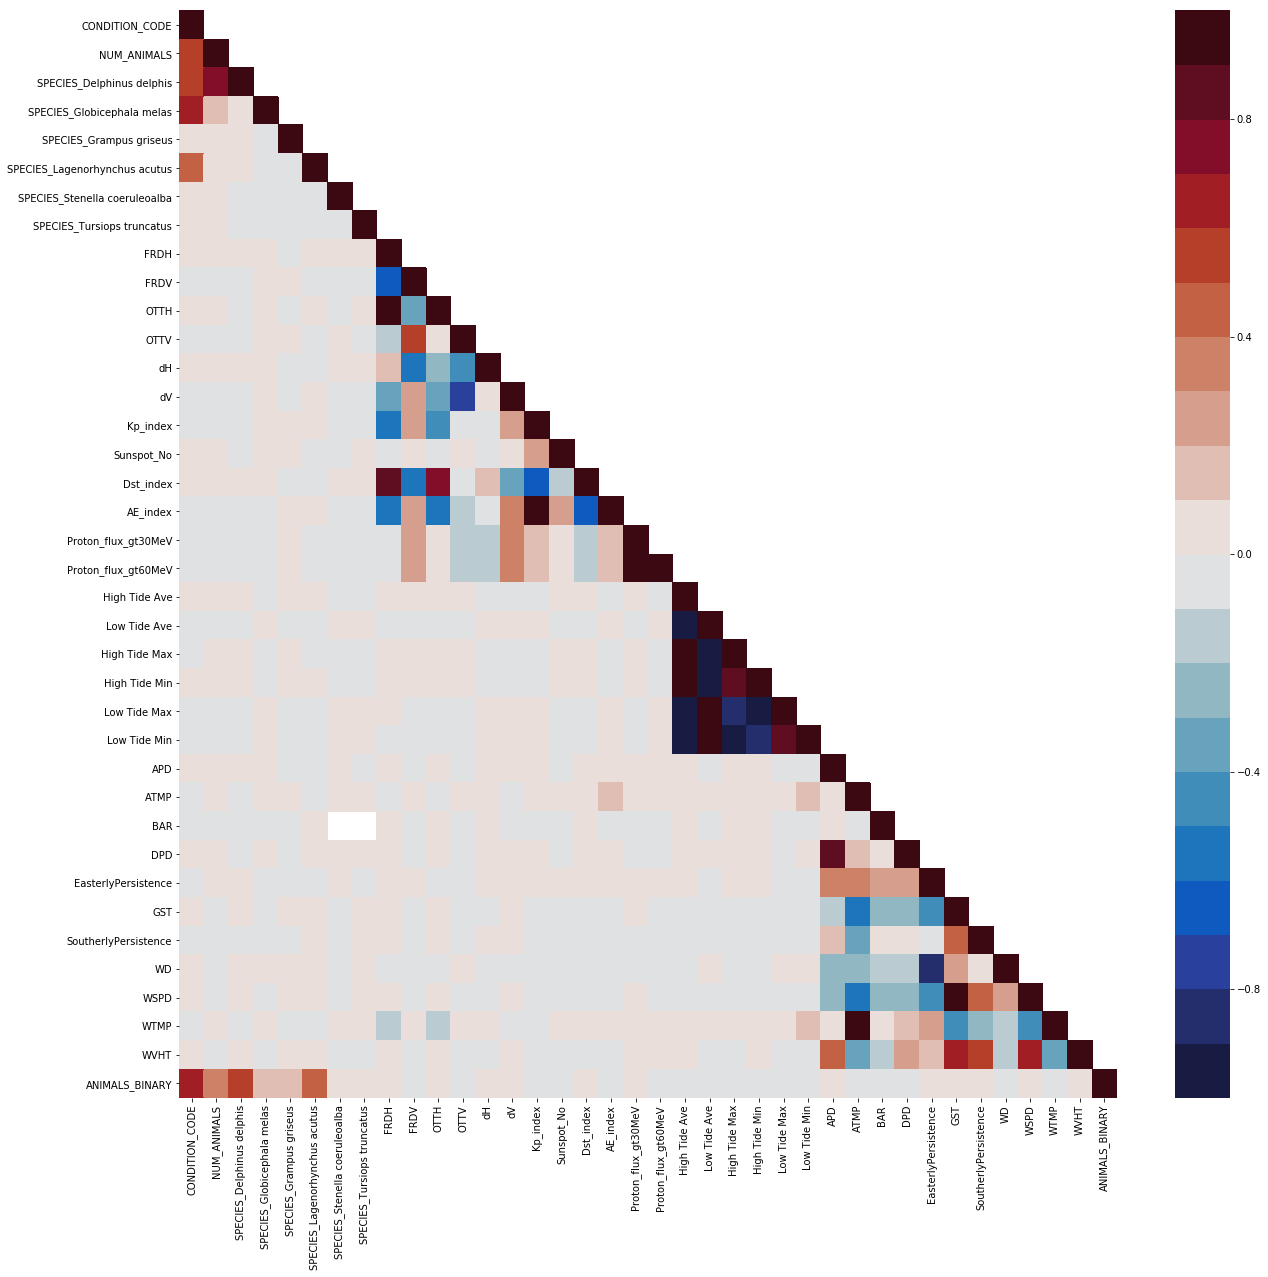

In [30]:
# Plot correlation matrix
f, ax = plt.subplots(figsize=(21, 20))
#ax.set_facecolor('black')
cmdict = cmo.tools.get_dict(cmo.balance)
my_cmap = matplotlib.colors.LinearSegmentedColormap('matteo', cmdict,20)
seaborn.heatmap(dfCorr, ax=ax, vmin=-1, vmax=1, mask=np.triu(np.ones([dfCorr.shape[1]]*2), k=1),cmap=my_cmap)